# Experiment: Glucose with 5x

A short experiment collecting glucose powerder with SERs and 5x lens.

In [13]:
from pathlib import Path
from raman.sample import read_txt, Sample, accumulate
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps
cmap = colormaps['cividis']

def add_plot_label():
    plt.xlabel("Raman Shift (cm^-1)")
    plt.ylabel("Intensity")
    plt.grid()

BASE_PATH:Path = Path("/app")

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
!wget -q https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf
mpl.font_manager.fontManager.addfont('Sarabun-Regular.ttf')
mpl.rc('font', family='Sarabun')
plt.rcParams ['font.family'] = ('Sarabun')

## 1. Glucose

0 /app/data/glucose/5x/txt/glucose_5x_0-71_600_785 nm_30 s_20_2024_12_17_12_41_21_01.txt
1 /app/data/glucose/5x/txt/glucose_5x_0-71_600_785 nm_30 s_5_2024_12_17_12_28_19_01.txt
2 /app/data/glucose/5x/txt/glucose_5x_0-71_600_785 nm_30 s_5_2024_12_17_12_30_56_01.txt


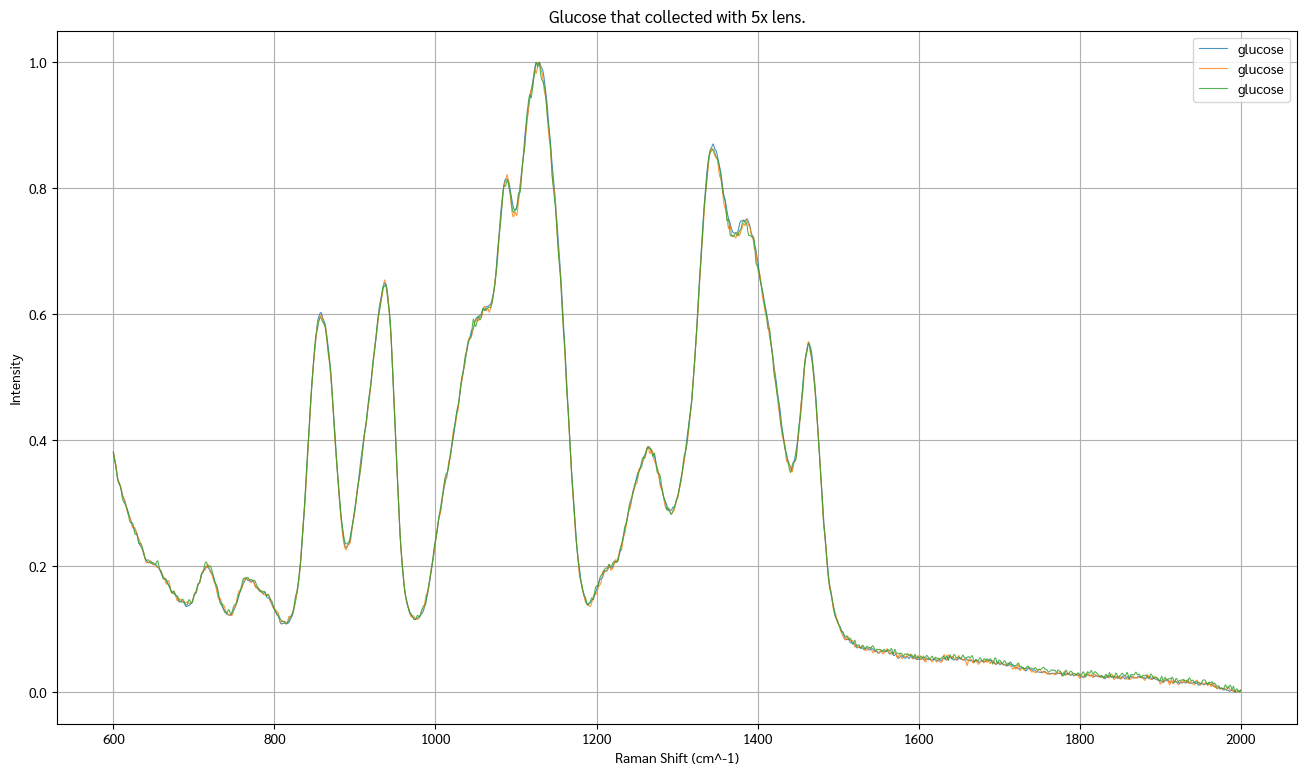

In [15]:
DATA_PATH:Path = BASE_PATH.joinpath("data/glucose/5x/txt")

plt.figure(figsize=(16,9))
glucose_5x:list[Sample] = []
for i, path in enumerate(sorted(DATA_PATH.glob("*.txt"))):
    print(i, path)
    sample = read_txt(path=path, verbose=True)
    sample.extract_range(low=600, high=2000)
    sample.normalized(method="minmax")
    glucose_5x.append(sample)
    sample.plot()

plt.title(f"Glucose that collected with 5x lens.")
plt.legend()
add_plot_label()
plt.show()

0 /app/data/glucose/10x/txt/glucose_600_785 nm_90 s_1_2024_10_29_15_11_45_01.txt
Found 1 spike(s) in path=/app/data/glucose/10x/txt/glucose_600_785 nm_90 s_1_2024_10_29_15_11_45_01.txt, self.remove_spike() is perform automatically.


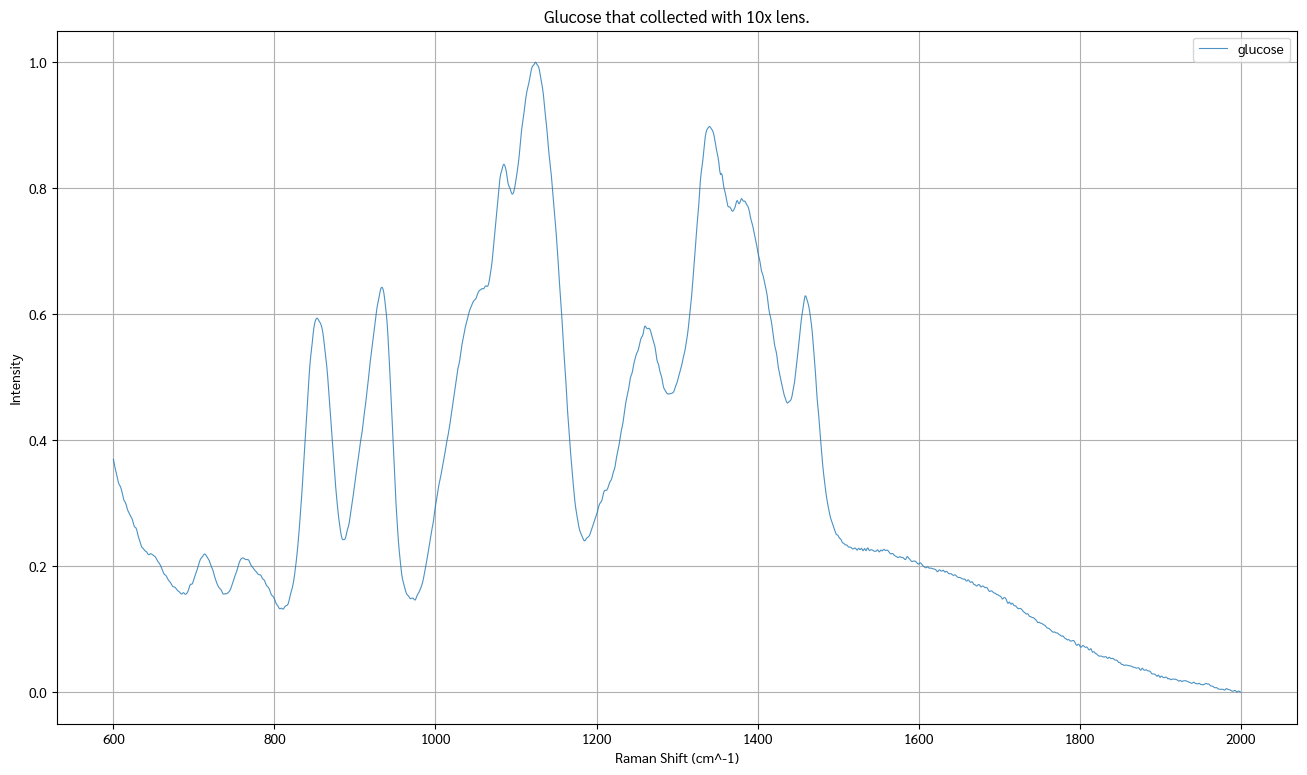

In [16]:
DATA_PATH:Path = BASE_PATH.joinpath("data/glucose/10x/txt")

plt.figure(figsize=(16,9))
glucose_10x:list[Sample] = []
for i, path in enumerate(sorted(DATA_PATH.glob("*.txt"))):
    print(i, path)
    # old name format
    name_format = ["name", "grating", "laser", "exposure", "accumulation", "year", "month", "date", "hour", "minute", "second", "01"]
    sample = read_txt(path=path, verbose=True, name_format=name_format)
    sample.extract_range(low=600, high=2000)
    sample.normalized(method="minmax")
    glucose_10x.append(sample)
    sample.plot()

plt.title(f"Glucose that collected with 10x lens.")
plt.legend()
add_plot_label()
plt.show()

In [17]:
glucose_5x_acc = accumulate(glucose_5x)
glucose_10x_acc = accumulate(glucose_10x)

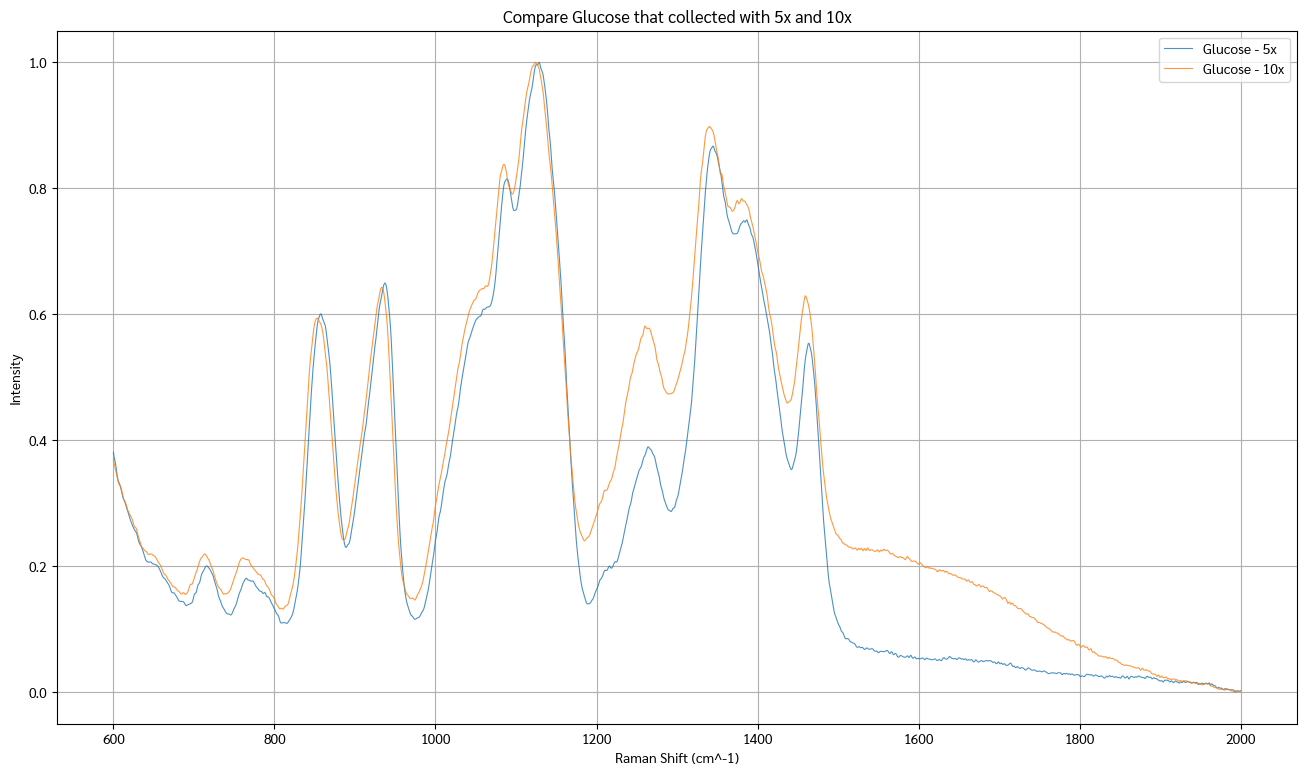

In [18]:
DATA_PATH:Path = BASE_PATH.joinpath("data/glucose/10x/txt")

plt.figure(figsize=(16,9))
glucose_5x_acc.plot(label="Glucose - 5x")
glucose_10x_acc.plot(label="Glucose - 10x")
plt.title(f"Compare Glucose that collected with 5x and 10x")
plt.legend()
add_plot_label()
plt.show()

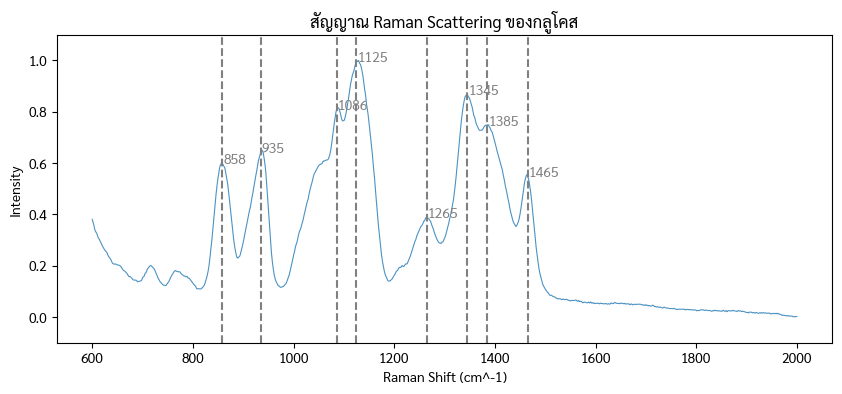

In [19]:
plt.figure(figsize=(10,4))
glucose_5x_acc.plot()
plt.title(f"สัญญาณ Raman Scattering ของกลูโคส")
peaks = [858,935,1086,1125,1265,1345,1385,1465]
for peak in peaks:
    plt.vlines(x=peak, ymin=-0.1, ymax=1.1, color='grey', ls='--')
    plt.text(s=peak, x=peak+2, y=glucose_5x_acc.at(peak), color='grey')

plt.ylim(-0.1, 1.1)
# plt.legend()
add_plot_label()
plt.grid()
plt.show()

In [20]:
glucose_5x_acc.at(900)

array(0.29140651)

In [21]:
glucose_5x_acc.save(basepath="/app/data")

File save to path=/app/data/glucose/5x/sample/glucose_5x_0-71_600_785 nm_30 s_30_2024_2024_12_17_12_41_21.txt


In [22]:
glucose_5x_acc


  Sample: glucose
    date: 2024-12-17 12:41:21
 grating: 600
   laser: 785 nm
   power: 0.71
    lens: 5x
exposure: 30 s
    accu: 30
    stat: Max=1.0 Min=0.0 Mean=0.27 Std=0.26